# 看图说话：谁是A股最值得长期投资的公司？

候选股票：万科、格力电器、贵州茅台、招商银行、中信证券、工商银行等

学习目标：
+ 学会自己画股票走势图
+ 学会比较不同股票间的走势

## Round1: 初始化quantos数据API

In [1]:
from jaqs.data import RemoteDataService
from jaqs.util import convert_int_to_datetime

import os
user  = os.environ.get('QUANTOS_USER')
token = os.environ.get('QUANTOS_TOKEN')

data_config = {
    "remote.data.address": "tcp://data.quantos.org:8910",
    "remote.data.username": user,
    "remote.data.password": token
}

ds = RemoteDataService()
ds.init_from_config(data_config)


Begin: DataApi login 18612562791@tcp://data.quantos.org:8910
    login success 



'0,'

## Round2 : 获取万科基本信息和收盘价数据

In [2]:
df_inst = ds.query_inst_info(
    '000002.SZ', fields="list_date,name"
)
print(df_inst)

df_wka, msg = ds.daily(
    '000002.SZ', 
    start_date=19910129, 
    end_date=20180101, 
    adjust_mode=None
)
df_wka.head(20)

           list_date   name
symbol                     
000002.SZ   19910129  万  科Ａ


,close,code,freq,high,low,oi,open,presettle,settle,symbol,trade_date,trade_status,turnover,volume,vwap
0,14.58,000002,1d,14.58,14.58,NaN,14.58,NaN,NaN,000002.SZ,19910129,交易,22000.0,300.0,73.33
1,14.51,000002,1d,14.51,14.51,NaN,14.51,NaN,NaN,000002.SZ,19910130,交易,123000.0,1700.0,72.35
2,14.51,000002,1d,14.51,14.51,NaN,14.51,NaN,NaN,000002.SZ,19910131,停牌,0.0,0.0,0.00
3,14.66,000002,1d,14.66,14.66,NaN,14.66,NaN,NaN,000002.SZ,19910204,交易,410000.0,5600.0,73.21
4,14.73,000002,1d,14.73,14.73,NaN,14.73,NaN,NaN,000002.SZ,19910205,交易,213000.0,2900.0,73.45
5,14.80,000002,1d,14.80,14.80,NaN,14.80,NaN,NaN,000002.SZ,19910206,交易,215000.0,2900.0,74.14
6,14.87,000002,1d,14.87,14.87,NaN,14.87,NaN,NaN,000002.SZ,19910207,交易,357000.0,4800.0,74.38
7,14.94,000002,1d,14.94,14.94,NaN,14.94,NaN,NaN,000002.SZ,19910208,交易,493000.0,6600.0,74.70
8,15.09,000002,1d,15.09,15.09,NaN,15.09,NaN,NaN,000002.SZ,19910211,交易,249000.0,3300.0,75.45
9,15.07,000002,1d,15.07,15.07,NaN,15.07,NaN,NaN,000002.SZ,19910212,交易,1778000.0,23600.0,75.34


## Round3 画出万科的股价走势图

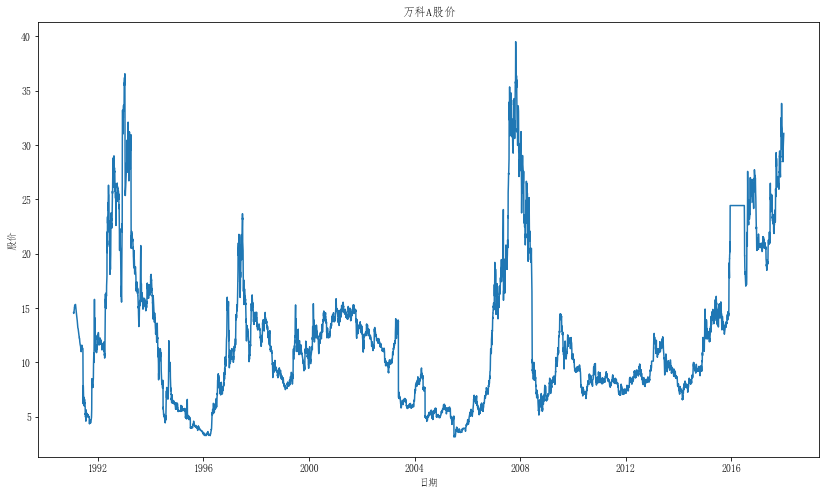

In [4]:
import matplotlib.pyplot as plt
from pylab import mpl
# 指定默认字体
mpl.rcParams['font.sans-serif'] = ['FangSong'] 
# 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(14, 8))
plt.plot(
    convert_int_to_datetime(df_wka['trade_date']),
    df_wka['close'].values
)

plt.xlabel('日期')
plt.ylabel('股价')
plt.title("万科A股价")
plt.show()

## Round4 : 获取万科复权收盘价数据并画图

要求：

1. 了解股票复权的具体含义
2. 看看万科复合增长率

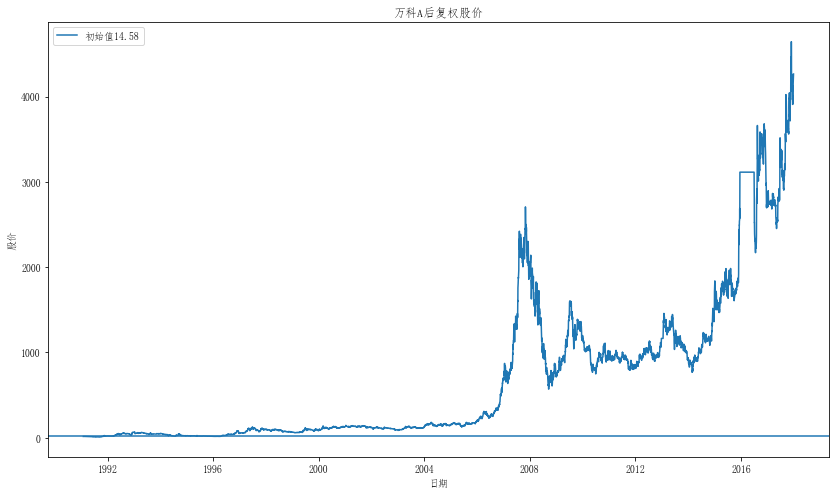

In [5]:
# 获取后复权数据
df_wka, msg = ds.daily(
    '000002.SZ', 
    start_date=19910129, end_date=20180101, 
    adjust_mode='post'
)

# 画图
plt.figure(figsize=(14, 8))
idx = convert_int_to_datetime(df_wka['trade_date'])
plt.plot(
    idx,
    df_wka['close'].values
)

plt.xlabel('日期')
plt.ylabel('股价')
plt.title("万科A后复权股价")

first_value = df_wka['close'].values[0]
plt.axhline(first_value, label='初始值' + str(first_value))
plt.legend()

## Round 5 : 画任意股票的价格走势

In [6]:
def plot_stock_price(ds, symbol, start_date, end_date, adjust_mode='post'):
    df_inst = ds.query_inst_info(symbol, fields="list_date,name")
    
    stock_name = df_inst['name'].loc[symbol]
    list_date  = df_inst['list_date'].loc[symbol]
    
    if start_date is None:
        start_date = list_date
    
    if end_date is None:
        end_date = 20990101
    
    df_price, msg = ds.daily(
        symbol, 
        start_date=start_date, 
        end_date=end_date, 
        adjust_mode=adjust_mode
    )

    plt.figure(figsize=(14, 8))
    idx = convert_int_to_datetime(df_price['trade_date'])
    plt.plot(
        idx,
        df_price['close'].values
    )

    plt.xlabel('日期')
    plt.ylabel('股价')
    plt.title(stock_name + '(' + symbol + ')' + '股价')


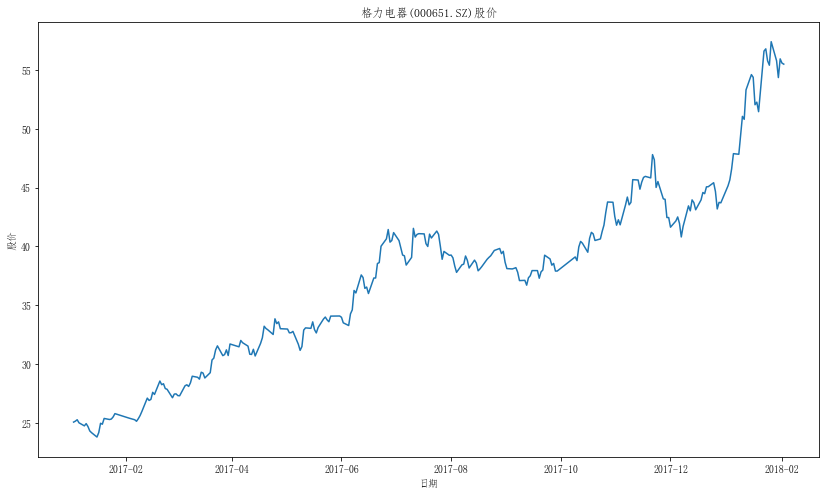

In [7]:
plot_stock_price(ds, '000651.SZ', 20170101, None, None)

## Round6: 画任意股票复合增长率走势

In [8]:
def plot_stock_return(ds, symbol, start_date=None, end_date=None):
    df_inst = ds.query_inst_info(symbol, fields="list_date,name")
    
    stock_name = df_inst['name'].loc[symbol]
    list_date  = df_inst['list_date'].loc[symbol]

    if start_date is None:
        start_date = list_date
    
    if end_date is None:
        end_date = 20990101
        
    df_price, msg = ds.daily(
        symbol, 
        start_date=start_date, 
        end_date=end_date, 
        adjust_mode='post'
    )
    df_price = df_price.set_index('trade_date')
    idx = df_price.index
    idx_date = convert_int_to_datetime(idx)
    price_array = df_price['close'].values
    return_array = price_array / price_array[0]
    
    plt.figure(figsize=(14, 8))

    ax = plt.subplot()
    ax.plot(idx_date, return_array, label=stock_name)
    ax.legend()

    plt.legend()

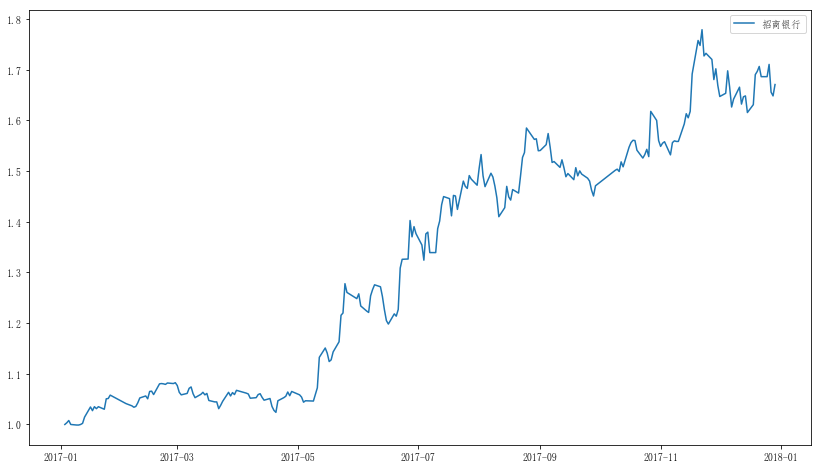

In [9]:
plot_stock_return(ds, '600036.SH', 20170101, 20180101)

## Round 7: 比较多只股票的收益率

In [10]:
# 1 获取复权价格数据
def get_stock_data(symbol_list):
    symbol_str = ','.join(symbol_list)
    df_inst = ds.query_inst_info(symbol_str, fields="list_date,name")
    
    dic_data = dict()

    for symbol, row in df_inst.iterrows():
        list_date = row['list_date']
        name = row['name']

        df_daily, msg = ds.daily(
            symbol, 
            start_date=list_date, 
            end_date=20990101, 
            adjust_mode='post'
        )
        df_daily = df_daily.set_index('trade_date')
        dic_data[symbol] = {'list_date': list_date,
                       'name': name,
                       'price': df_daily}
    return dic_data

In [11]:
# 2 计算收益率序列并画图
def plot_stock_return_multi(symbol_list, start_date=None, end_date=None):
    
    dic_data = get_stock_data(symbol_list)
    
    plt.figure(figsize=(16, 10))
    
    slice_ = slice(start_date, end_date, None)
    
    for symbol, dic in dic_data.items():
        name = dic['name']
        df_price = dic['price'].loc[slice_]
        idx = df_price.index
        idx_date = convert_int_to_datetime(idx)
        price_array = df_price['close'].values
        return_array = price_array / price_array[0]
        plt.plot(idx_date, return_array, label=name)

    plt.axhline(1, color='black', linestyle = '--')
        
    plt.xlabel('时间')
    plt.ylabel('累计收益率')
    plt.title('累计收益率变化图')
    plt.legend()
    

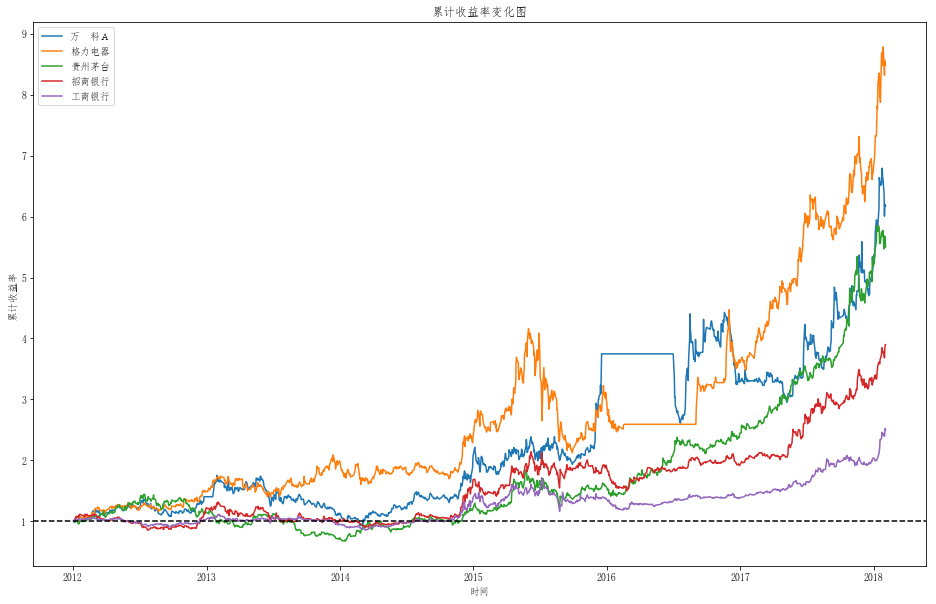

In [12]:
symbol_list = [
    '000002.SZ', 
    '000651.SZ', 
    '600519.SH', 
    '600036.SH', 
    '601398.SH'
]

plot_stock_return_multi(
    symbol_list, 
    start_date=20120101, 
    end_date=None
)

In [ ]:
# 保存图片
plt.savefig('return.png', dpi = 300)